###<b> 1. Introduction


The bicycle industry has grown significantly in recent years across Europe, driven by factors such as environmental consciousness, urbanization, and a rising interest in fitness and outdoor activities. As demand for bicycles continues to increase, manufacturers and retailers are looking for ways to optimize their sales strategies and improve profitability.

Machine learning is a powerful tool that can be used to predict future trends and patterns in complex datasets. This makes it a promising approach for forecasting bike sales. By using historical sales data and relevant features, such as date, customer demographics, product information, and financial metrics, machine learning algorithms can provide valuable insights and predictions about future sales trends.

In this study, we aim to develop a machine learning model to predict bike sales across Europe. The dataset used in this study contains a comprehensive collection of relevant attributes, including date, customer age, gender, country, product categories, order quantities, unit costs, prices, and most importantly, the profit generated from each transaction. By analyzing this diverse set of features and using regression algorithms, we aim to build a predictive model that can accurately forecast the future sales and profitability for different products and regions.

The outcome of this predictive model can help bicycle manufacturers and retailers make informed decisions about inventory management, marketing strategies, and sales forecasts. A successful implementation of this machine learning approach can lead to improved operational efficiency, increased revenue, and enhanced customer satisfaction in the dynamic and competitive bicycle market in Europe.

**Key pointers:**

* The bicycle industry is growing in Europe, driven by factors such as environmental consciousness, urbanization, and a rising interest in fitness and outdoor activities.
* Machine learning can be used to predict future trends and patterns in complex datasets, making it a promising approach for forecasting bike sales.
* This study aims to develop a machine learning model to predict bike sales across Europe.
* The outcome of this predictive model can help bicycle manufacturers and retailers make informed decisions about inventory management, marketing strategies, and sales forecasts.

###<b>2. Data Description

The following features are included in the dataset:

* **Date:** The date of the transaction when the bike or related accessory was sold.
* **Day:** The numerical day of the month when the transaction occurred.
* **Month:** The month when the transaction took place.
* **Year:** The year when the transaction occurred.
* **Customer_Age:** The age of the customer who made the purchase.
* **Age_Group:** The categorical grouping of customers based on their age, such as "Youth (<25)" or "Adults (35-64)."
* **Customer_Gender:** The gender of the customer who made the purchase, denoted by "M" for male or "F" for female.
* **Country:** The country where the sale was made.
* **State:** The state or region within the country where the sale occurred.
* **Product_Category:** The broad category to which the product belongs, such as "Accessories" or other specific categories like "Bikes."
* **Sub_Category:** The specific sub-category of the product, such as "Bike Racks" or other types of products.
* **Product:** The name or description of the specific product sold.
* **Order_Quantity:** The quantity of the product ordered by the customer in a single transaction.
* **Unit_Cost:** The cost of a single unit of the product.
* **Unit_Price:** The selling price of a single unit of the product.
* **Profit:** The profit generated from the sale, calculated as the difference between the revenue (selling price * order quantity) and the cost (unit cost * order quantity).
* **Cost:** The total cost of the transaction, calculated as the product of unit cost and order quantity.
* **Revenue:** The total revenue from the sale, calculated as the product of unit price and order quantity.



###<b>3. Initial Data Exploration

####<b>3.1. importing modules

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=ff6a8f8f15cbc72764c606969e3e077c9254d0f70c110f46c8ac88afd80f5e4a
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.ml.feature import StringIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import numpy as np



import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")

####<b>3.2. Loading data using pyspark

In [ ]:

spark = SparkSession.builder.appName("Bike_Sales_Prediction").getOrCreate()

# Reading the data
data = spark.read.csv("Sales.csv", header=True, inferSchema=True)
data.show(5)

+----------+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|      Date|Day|   Month|Year|Customer_Age|     Age_Group|Customer_Gender|  Country|           State|Product_Category|Sub_Category|            Product|Order_Quantity|Unit_Cost|Unit_Price|Profit|Cost|Revenue|
+----------+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|2013-11-26| 26|November|2013|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|             8|       45|       120|   590| 360|    950|
|2015-11-26| 26|November|2015|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|             8|  

In [ ]:
data.describe().show()

+-------+------------------+---------+------------------+------------------+--------------+---------------+-------------+-------+----------------+------------+--------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+
|summary|               Day|    Month|              Year|      Customer_Age|     Age_Group|Customer_Gender|      Country|  State|Product_Category|Sub_Category|             Product|    Order_Quantity|        Unit_Cost|       Unit_Price|           Profit|             Cost|           Revenue|
+-------+------------------+---------+------------------+------------------+--------------+---------------+-------------+-------+----------------+------------+--------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+
|  count|            113036|   113036|            113036|            113036|        113036|         113036|       113036| 11303

In [ ]:
# Printing the number of rows and columns in the data
num_rows = data.count()
num_cols = len(data.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 113036
Number of columns: 18


In [ ]:
# Showing the schema of the data
data.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Age_Group: string (nullable = true)
 |-- Customer_Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Sub_Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Order_Quantity: integer (nullable = true)
 |-- Unit_Cost: integer (nullable = true)
 |-- Unit_Price: integer (nullable = true)
 |-- Profit: integer (nullable = true)
 |-- Cost: integer (nullable = true)
 |-- Revenue: integer (nullable = true)



In [ ]:
# Explore unique values in categorical columns
categorical_columns = [column for column in data.columns if data.select(column).distinct().count() < 10]
for column in categorical_columns:
    data.select(column).distinct().show()

+----+
|Year|
+----+
|2015|
|2013|
|2014|
|2012|
|2016|
|2011|
+----+

+--------------------+
|           Age_Group|
+--------------------+
|         Youth (<25)|
|      Adults (35-64)|
|       Seniors (64+)|
|Young Adults (25-34)|
+--------------------+

+---------------+
|Customer_Gender|
+---------------+
|              F|
|              M|
+---------------+

+--------------+
|       Country|
+--------------+
|       Germany|
|        France|
| United States|
|        Canada|
|     Australia|
|United Kingdom|
+--------------+

+----------------+
|Product_Category|
+----------------+
|           Bikes|
|        Clothing|
|     Accessories|
+----------------+



In [ ]:
data.dtypes

[('Date', 'date'),
 ('Day', 'int'),
 ('Month', 'string'),
 ('Year', 'int'),
 ('Customer_Age', 'int'),
 ('Age_Group', 'string'),
 ('Customer_Gender', 'string'),
 ('Country', 'string'),
 ('State', 'string'),
 ('Product_Category', 'string'),
 ('Sub_Category', 'string'),
 ('Product', 'string'),
 ('Order_Quantity', 'int'),
 ('Unit_Cost', 'int'),
 ('Unit_Price', 'int'),
 ('Profit', 'int'),
 ('Cost', 'int'),
 ('Revenue', 'int')]

In [ ]:
data.select(categorical_columns).describe().show()

+-------+------------------+--------------+---------------+-------------+----------------+
|summary|              Year|     Age_Group|Customer_Gender|      Country|Product_Category|
+-------+------------------+--------------+---------------+-------------+----------------+
|  count|            113036|        113036|         113036|       113036|          113036|
|   mean|2014.4017392689054|          null|           null|         null|            null|
| stddev|1.2725103861594522|          null|           null|         null|            null|
|    min|              2011|Adults (35-64)|              F|    Australia|     Accessories|
|    max|              2016|   Youth (<25)|              M|United States|        Clothing|
+-------+------------------+--------------+---------------+-------------+----------------+



<b>Observations</b>

The dataset contains information related to bike sales and has a total of 113,036 records. The target variable is "Profit," which represents the profit generated from each bike sale.

The "Day," "Month," and "Year" columns represent the date of the bike sale. The average day of the month is around 15, indicating a relatively even distribution of sales throughout the month. The majority of sales were recorded between the years 2011 and 2016.

The "Customer_Age" column represents the age of the customers involved in the bike sales. The average customer age is approximately 36 years, with a standard deviation of 11 years, indicating a wide range of ages among the customers.

The "Age_Group" column categorizes customers into different age groups based on their age. The distribution of customers across age groups is not provided in the summary.

The "Customer_Gender" column represents the gender of the customers involved in the bike sales. The distribution of genders among the customers is not provided in the summary.

The "Country" and "State" columns represent the country and state where the bike sales occurred. The dataset includes sales from various countries, with the majority of sales from Australia and the United States.

The "Product_Category," "Sub_Category," and "Product" columns provide information about the categories and specific products sold. The dataset includes various product categories and sub-categories, ranging from accessories to clothing.

The "Order_Quantity," "Unit_Cost," and "Unit_Price" columns represent the quantity, unit cost, and unit price of each bike sold, respectively. The average order quantity is approximately 12 bikes, with unit costs and prices varying significantly across different bike sales.

The "Profit," "Cost," and "Revenue" columns represent the profit, cost, and revenue generated from each bike sale, respectively. The average profit per sale is around 285 dollars, while the average cost and revenue per sale are approximately 469 and 754 dollars, respectively.



###<b>2. Data Preprocessing

####<b>2.1. Checking for missing values

In [ ]:
# Checking for missing values in the data
missing_values = data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])

# Converting the result to pandas DataFrame for better visualization
missing_values_df = missing_values.toPandas().transpose()
missing_values_df.columns = ['Missing Count']
missing_values_df['Percentage'] = (missing_values_df['Missing Count'] / data.count()) * 100

# Showing the missing values
print("Missing Values:")
print(missing_values_df)

Missing Values:
                  Missing Count  Percentage
Date                          0         0.0
Day                           0         0.0
Month                         0         0.0
Year                          0         0.0
Customer_Age                  0         0.0
Age_Group                     0         0.0
Customer_Gender               0         0.0
Country                       0         0.0
State                         0         0.0
Product_Category              0         0.0
Sub_Category                  0         0.0
Product                       0         0.0
Order_Quantity                0         0.0
Unit_Cost                     0         0.0
Unit_Price                    0         0.0
Profit                        0         0.0
Cost                          0         0.0
Revenue                       0         0.0


<b>Observations</b>

It can be observed that there are no missing values in the data which is a good sign as there would not require any assumptions required to impute any values

###<b>3. Exploratory Data Analysis

####<b>3.1. Correlation analysis

In [ ]:
numeric_columns = [column for column in data.columns if data.select(column).dtypes[0][1] in ('int', 'double')]
correlation_matrix = data.select(numeric_columns).toPandas().corr()
print(correlation_matrix)

                     Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.00

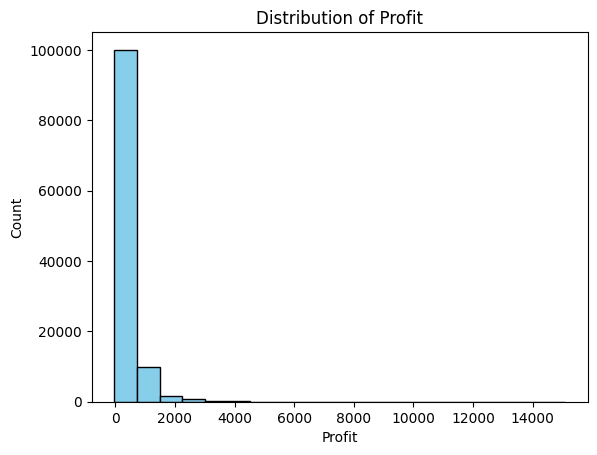

In [ ]:


# Assuming "Profit" is the target variable
profit_values = data.select("Profit").rdd.flatMap(lambda x: x).collect()
plt.hist(profit_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Distribution of Profit')
plt.show()


In [ ]:
data.groupBy("Profit").count().show()


+------+-----+
|Profit|count|
+------+-----+
|   148|  141|
|   496|   27|
|   471|   75|
|   463|    9|
|  1342|    8|
|  1645|    2|
|   243|   95|
|   392|   32|
|  2811|    5|
|   737|    7|
|   897|   52|
|  1483|    1|
|    31|  480|
|   516|   16|
|  1352|   53|
|  1650|   30|
|   137|  116|
|    85|  249|
|   251|  279|
|   580|    3|
+------+-----+
only showing top 20 rows



In [ ]:
data.groupBy("Date").count().orderBy("Date").show()


+----------+-----+
|      Date|count|
+----------+-----+
|2011-01-01|    5|
|2011-01-02|    4|
|2011-01-03|    8|
|2011-01-04|    5|
|2011-01-05|    3|
|2011-01-06|    6|
|2011-01-07|    4|
|2011-01-08|    8|
|2011-01-09|    5|
|2011-01-10|    4|
|2011-01-11|    9|
|2011-01-12|    7|
|2011-01-13|    3|
|2011-01-14|    9|
|2011-01-15|    7|
|2011-01-16|    7|
|2011-01-17|    8|
|2011-01-18|    6|
|2011-01-19|    6|
|2011-01-20|    6|
+----------+-----+
only showing top 20 rows



In [ ]:
# Converting PySpark DataFrame to Pandas DataFrame
pandas_data = data.toPandas()

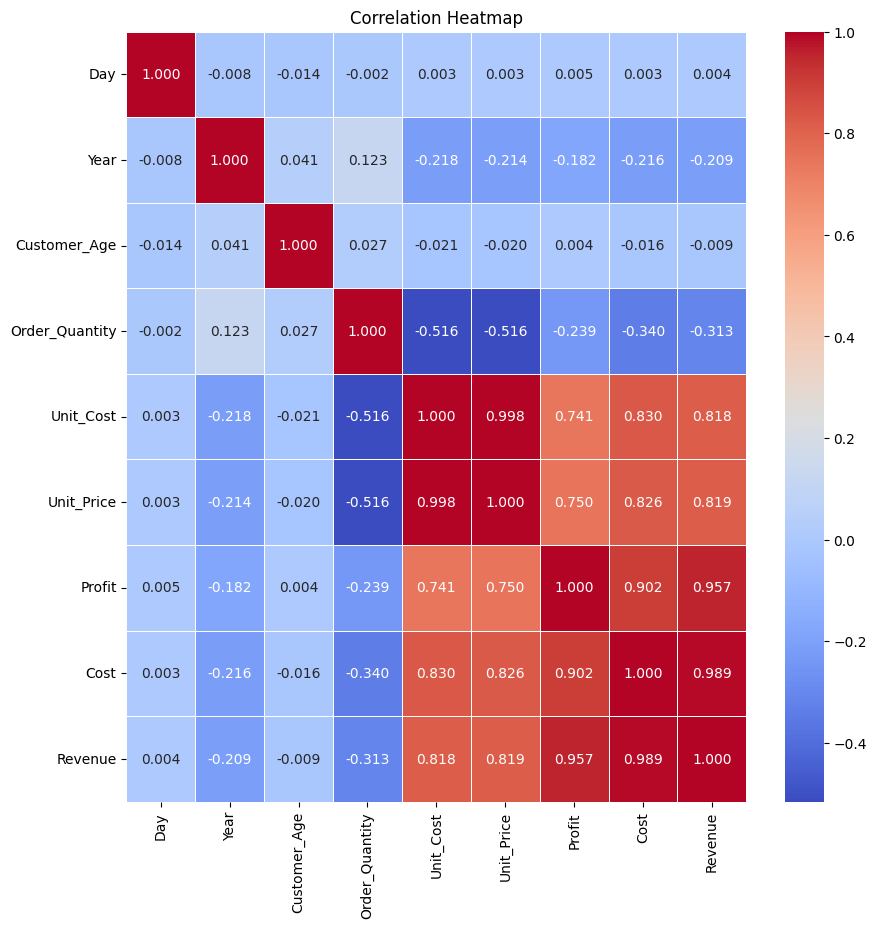

In [ ]:
# Compute correlation matrix
correlation_matrix = pandas_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()


<b> Observations</b>

The correlation matrix provides valuable insights into the relationships between different numerical features in the dataset. In this bike sales prediction project, the target variable is "Profit." Let's discuss some key observations based on the correlation coefficients:

1. Day and Year: The correlation coefficient between "Day" and "Year" is very close to zero (-0.007635), indicating a weak linear relationship. It suggests that the day of the month and the year of the sale have minimal impact on the profit.

2. Customer Age and Order Quantity: The correlation coefficient between "Customer Age" and "Order Quantity" is also quite low (-0.014296), implying that there is little correlation between the age of the customer and the quantity of bikes ordered.

3. Unit Cost and Unit Price: The features "Unit Cost" and "Unit Price" are highly positively correlated (0.997894), which is expected since unit price is often calculated based on the unit cost and includes profit margins.

4. Profit and Revenue: The target variable "Profit" shows a strong positive correlation with "Revenue" (0.956572), suggesting that as the revenue from sales increases, so does the profit.

5. Profit and Cost: "Profit" has a moderately strong positive correlation with "Cost" (0.902233). This indicates that as the cost of products sold increases, there is a positive impact on the profit.

6. Order Quantity and Unit Cost/Price: The features "Order Quantity," "Unit Cost," and "Unit Price" show moderate negative correlations with each other. This suggests that as the order quantity increases, the unit cost and unit price decrease, which might be due to bulk discounts or economies of scale.


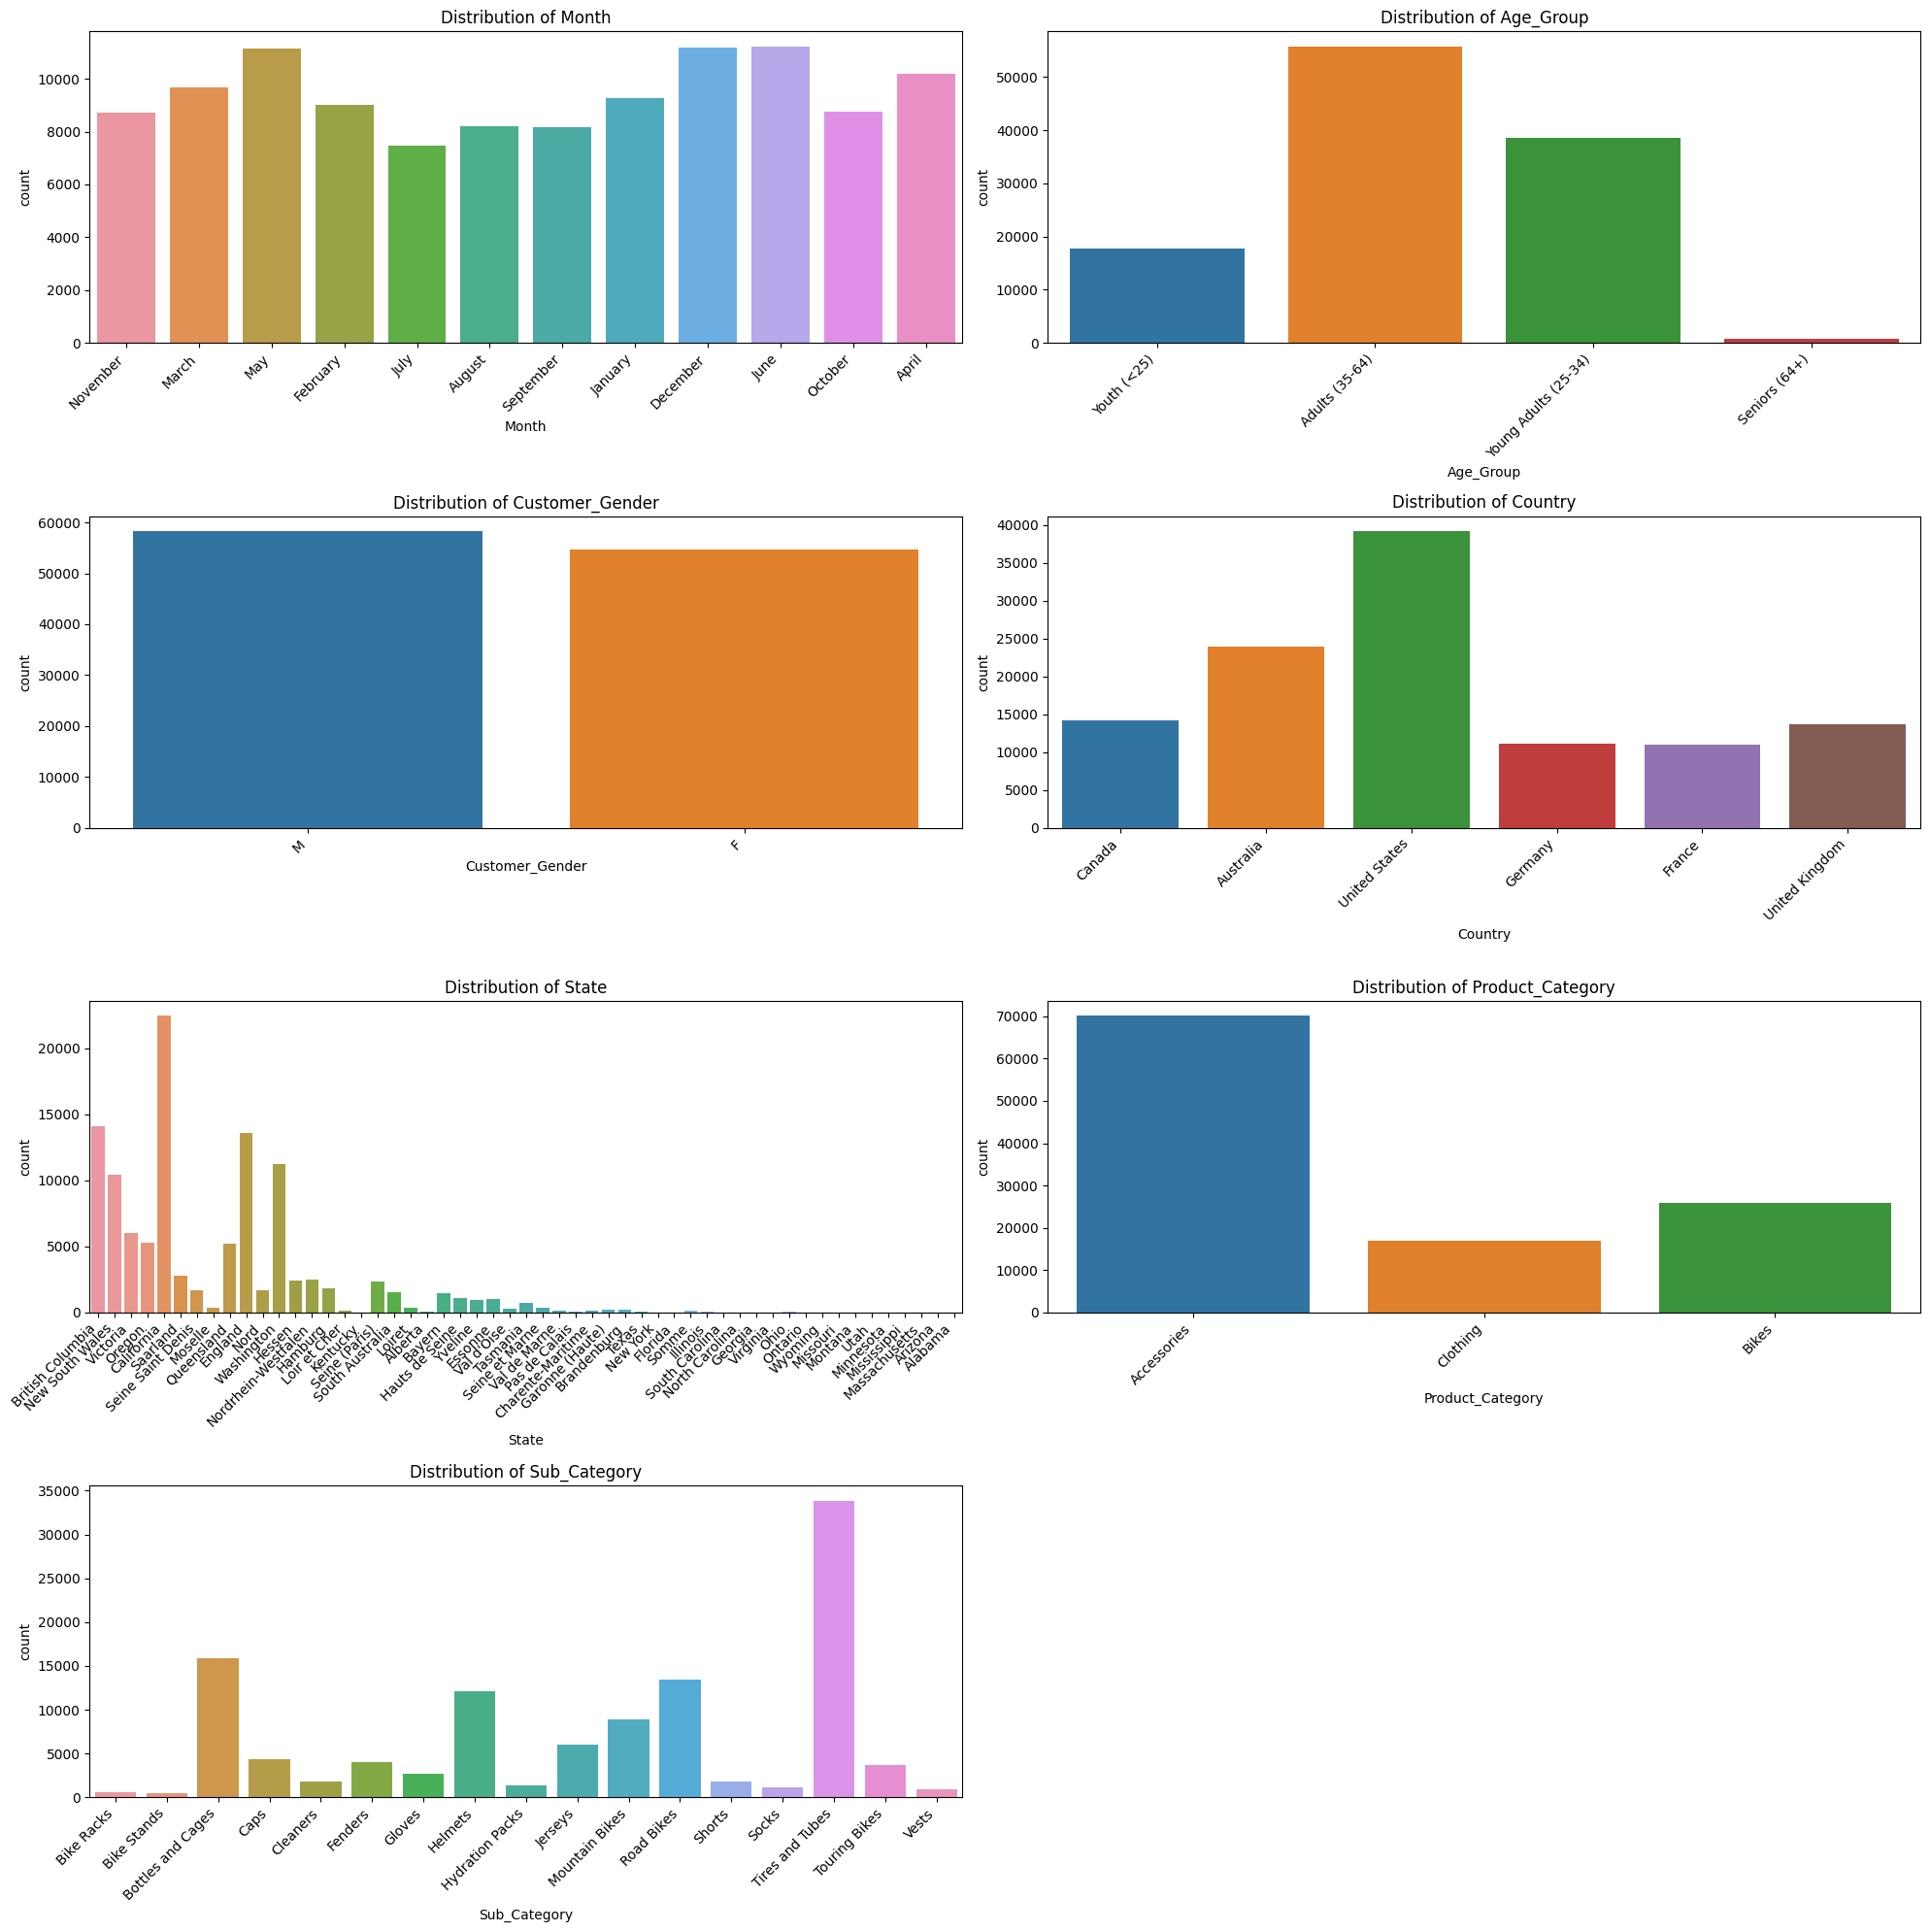

In [ ]:
# distribution of categorical columns

categorical_cols = ['Month','Age_Group','Customer_Gender','Country','State','Product_Category','Sub_Category']

# Plot distribution of categorical features
plt.figure(figsize=(20,20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=pandas_data)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




<b> Observations</b>

It can be observed that december, June and May are the months with highest sales and there are good amount of both males and females going for the purchase of bikes and most important subcategory with lot of purchases is the tires and tubes and it would even be showing the most interest to use bikes.

The highest usage of sales even seem to be in California followed by british columbia

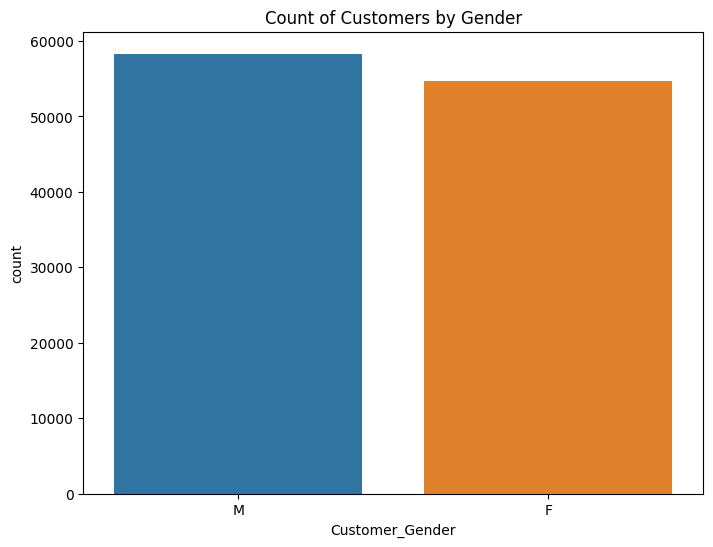

In [ ]:
# Create a count plot for Customer Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=pandas_data, x='Customer_Gender')
plt.title("Count of Customers by Gender")
plt.show()


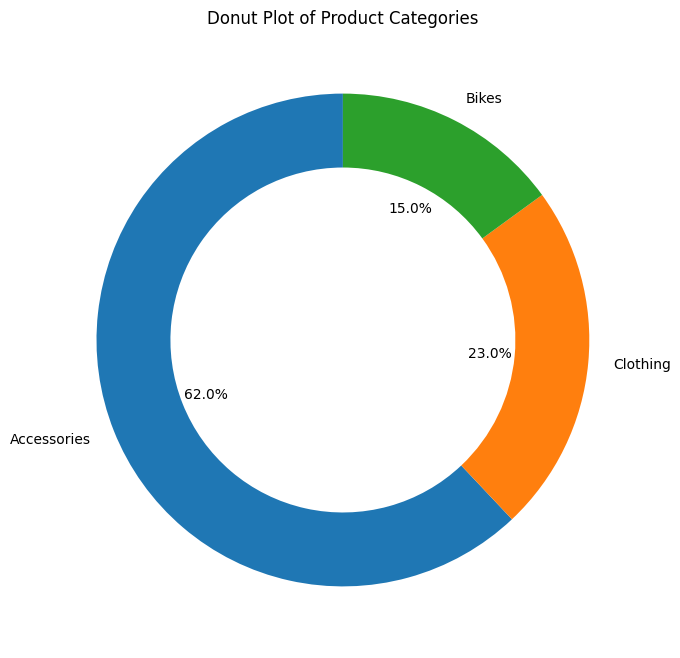

In [ ]:
# Create a donut plot for Product Categories
plt.figure(figsize=(8, 8))
plt.pie(pandas_data['Product_Category'].value_counts(), labels=pandas_data['Product_Category'].unique(),
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title("Donut Plot of Product Categories")
plt.show()


It can be observed that 62% of purchases made are accessories and 23% are clothing and can be riding gear and 15% of sales are of bikes

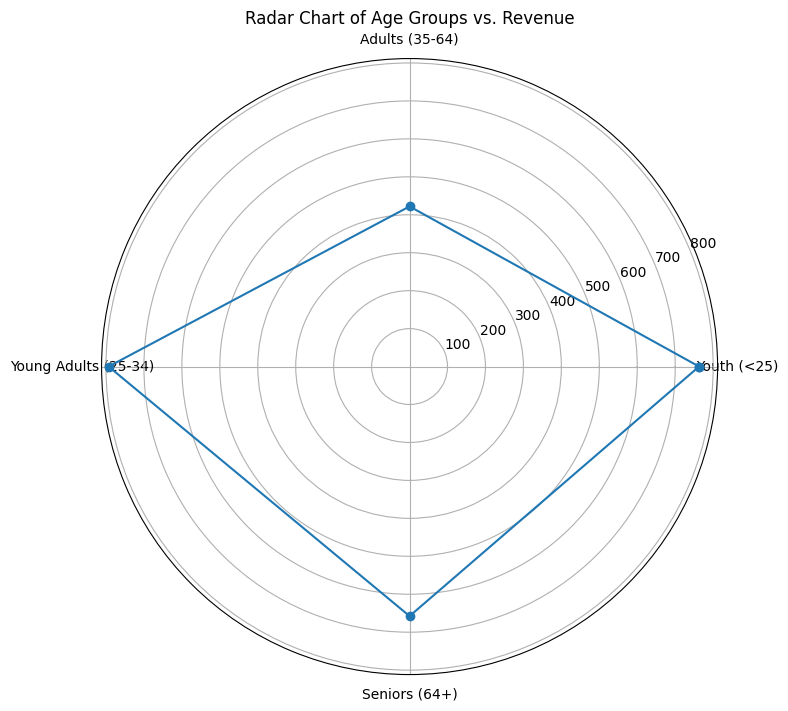

In [ ]:
# Create a radar chart for Age Groups and Revenue
plt.figure(figsize=(8, 8))
categories = pandas_data['Age_Group'].unique()
N = len(categories)
values = pandas_data.groupby('Age_Group')['Revenue'].mean().values.tolist()
values += values[:1]
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
plt.polar(angles, values, marker='o')
plt.xticks(angles[:-1], categories)
plt.title("Radar Chart of Age Groups vs. Revenue")
plt.show()


- It can be observed that revenue tends to increase from youth to adults and slowly decrease as we move from adults to senior citizens

<Axes: xlabel='Product_Category', ylabel='count'>

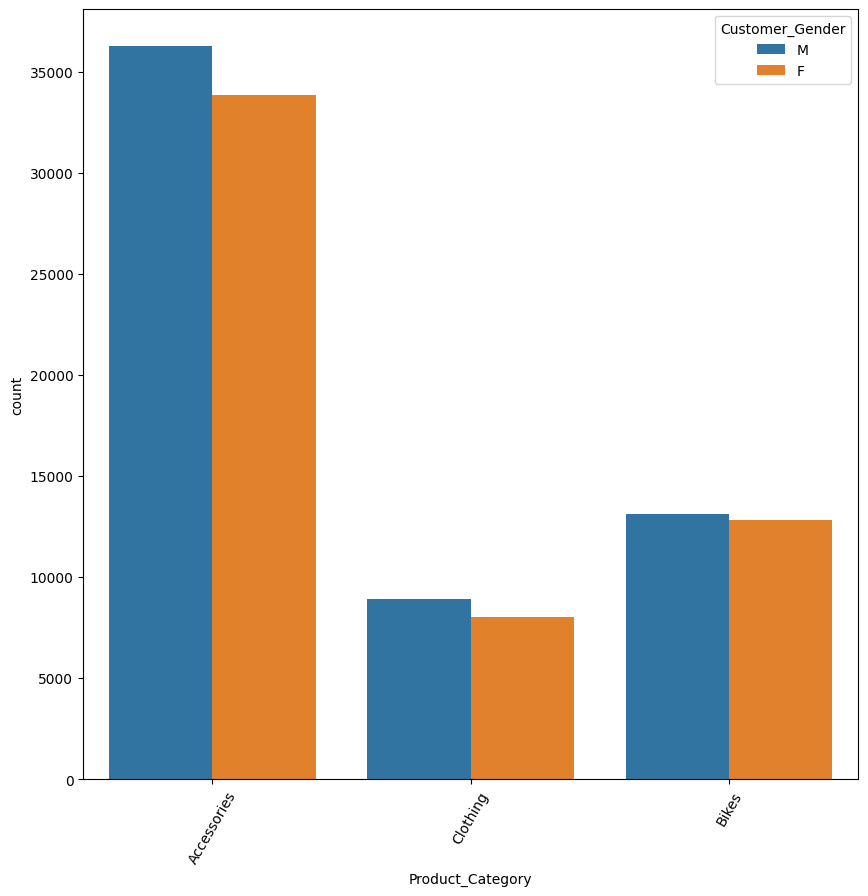

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=60)
ax = pandas_data.groupby('Customer_Gender')['Product_Category'].value_counts()
plt.savefig('Customer_GendervsProduct_Category.jpg')
sns.countplot(data = pandas_data, x='Product_Category', hue='Customer_Gender')

- It can be observed that regardless of the category of accessories, clothing or Bikes, Males have high sale count as compared to females

<Axes: xlabel='Sub_Category', ylabel='count'>

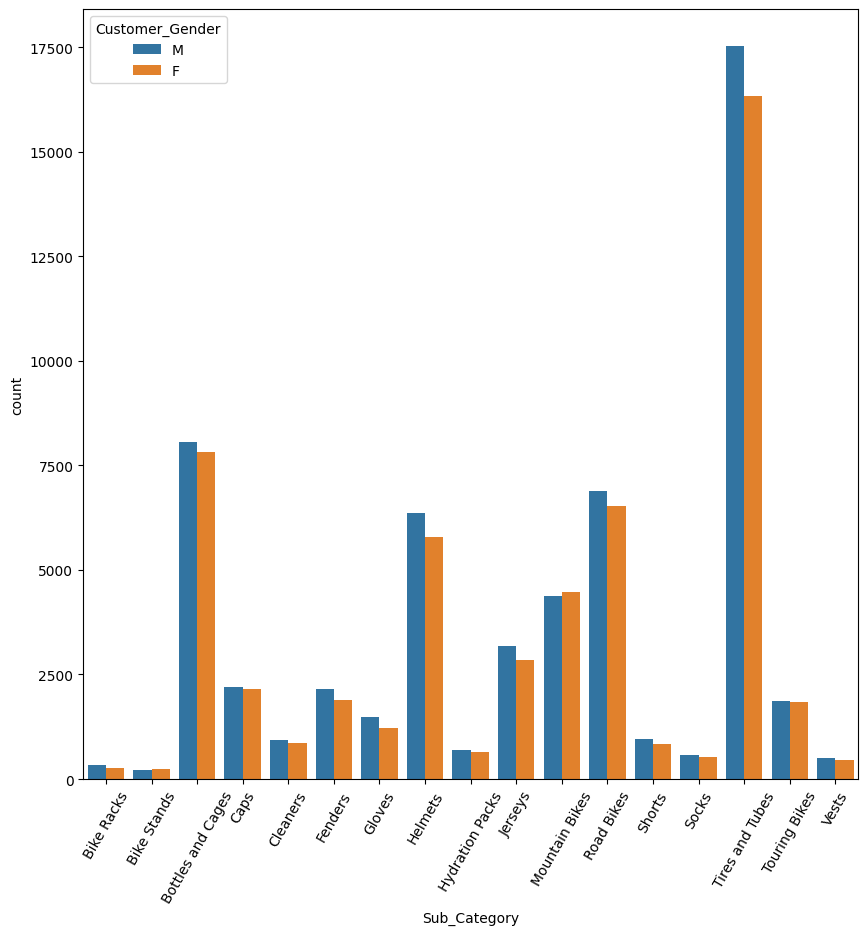

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=60)
ax = pandas_data.groupby('Customer_Gender')['Sub_Category'].value_counts()
plt.savefig('Customer_GendervsSub_category.jpg')
sns.countplot(data = pandas_data, x='Sub_Category', hue='Customer_Gender')

Tyres seem to be mostly purchased by both the genders followed by Bike stands and helmets

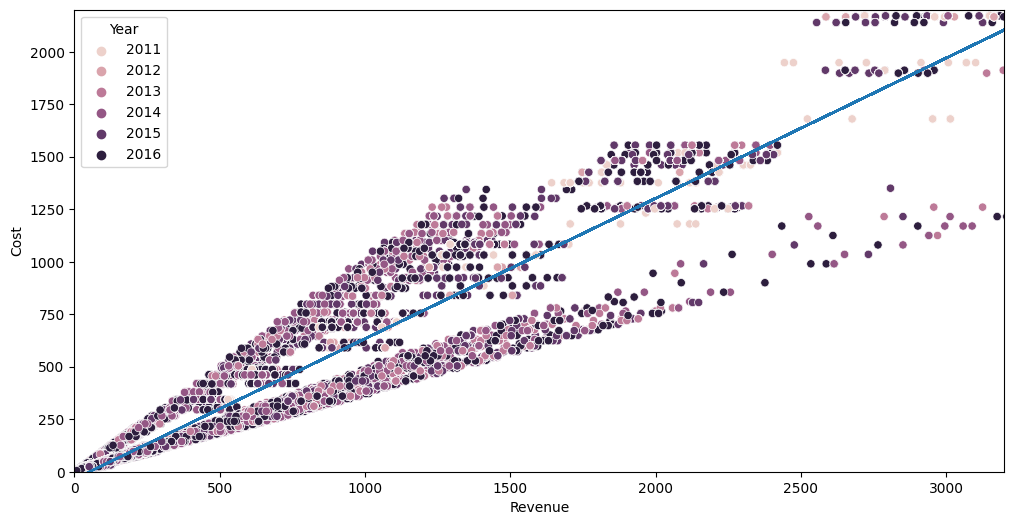

In [ ]:
sns.scatterplot(data=pandas_data, x="Revenue", y="Cost", hue='Year')
plt.xlim(0,3200)
plt.ylim(0,2200)
plt.title("Revenue vs Cost")
plt.gcf().set_size_inches(13,7)
mo, bo = np.polyfit(pandas_data["Revenue"], pandas_data["Cost"], 1)
plt.plot(pandas_data["Revenue"], mo*pandas_data["Revenue"] + bo);

<Figure size 1000x1000 with 0 Axes>

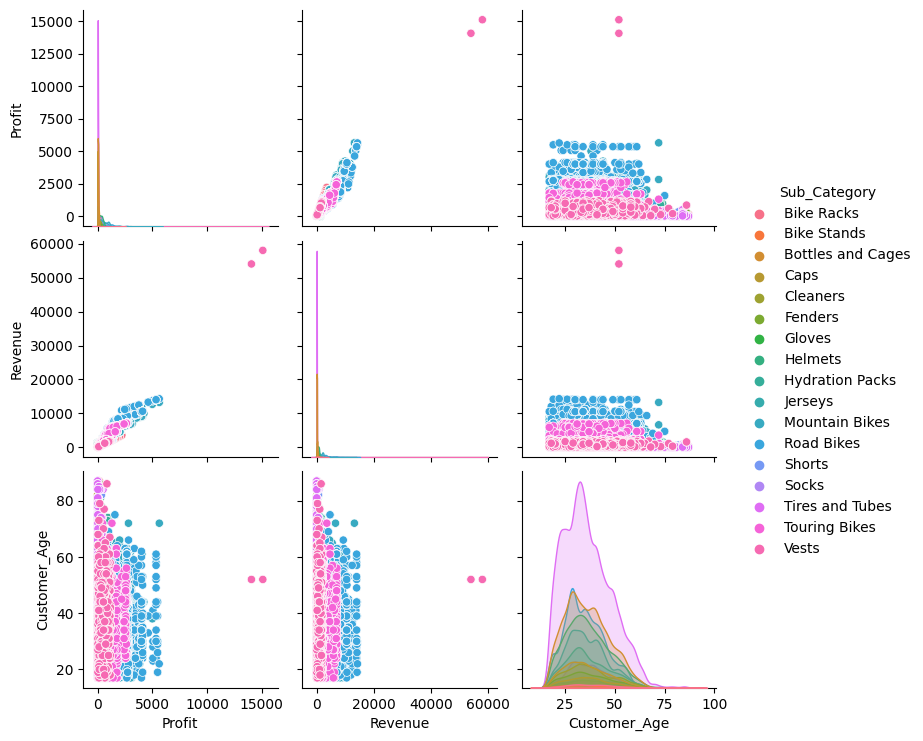

In [ ]:
columns_to_plot = ['Sub_Category', 'Profit', 'Revenue', 'Customer_Age']
plt.figure(figsize=(10,10))
sns.pairplot(pandas_data[columns_to_plot], hue='Sub_Category')
plt.show()

- From the above two correlation plots, we can clearly observe that 'Order_Quantity','Unit_Cost','Unit_Price','Revenue' have higher correlation and can be removed from the data before modeling

### <b>4. Feature Engineering

####<b>4.1. Dropping the features with the highest correlation

In [ ]:
pandas_data.drop(['Order_Quantity','Unit_Cost','Unit_Price','Revenue'], axis=1, inplace=True)

####<b>4.2. Handling outliers

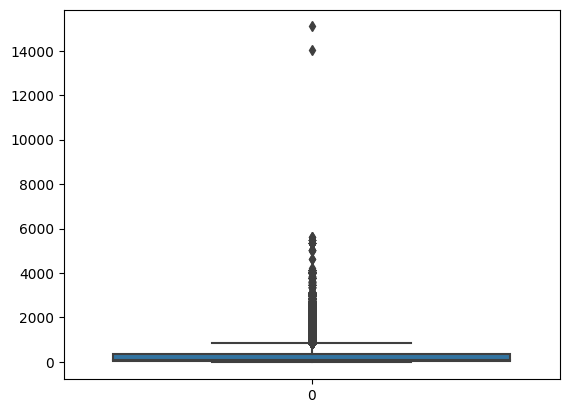

In [ ]:
sns.boxplot(pandas_data['Profit']);

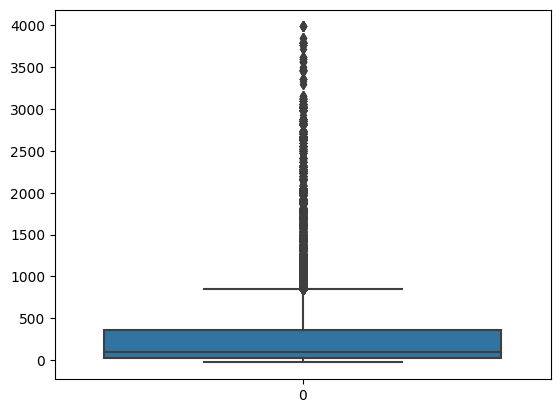

In [ ]:
pandas_data=pandas_data[pandas_data['Profit']<=4000]
sns.boxplot(pandas_data['Profit']);

<Axes: >

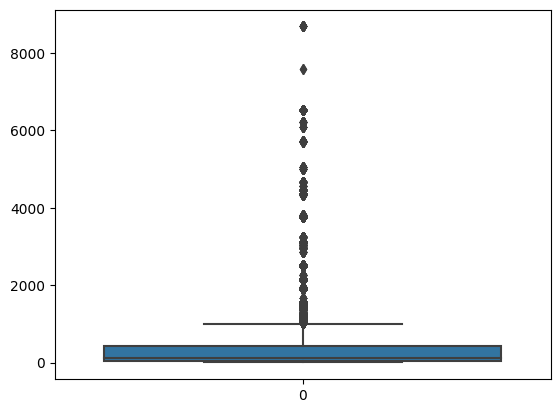

In [ ]:
sns.boxplot(pandas_data['Cost'])

<Axes: >

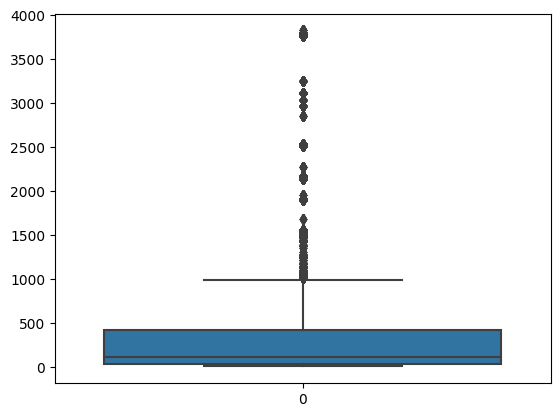

In [ ]:
pandas_data=pandas_data[pandas_data['Cost']<=4000]
sns.boxplot(pandas_data['Cost'])

###<b>4.3. Handling Duplicates

In [ ]:
pandas_data.duplicated().values.any()

True

In [ ]:
pandas_data.duplicated().sum()

998

In [ ]:
print("Shape of data before dropping duplicates: ",pandas_data.shape)
pandas_data = pandas_data.drop_duplicates()
print("Shape of data after dropping duplicates: ",pandas_data.shape)

Shape of data before dropping duplicates:  (111365, 14)
Shape of data after dropping duplicates:  (110367, 14)


In [ ]:
# dropping unrequired feature date
pandas_data.drop('Date',axis=1,inplace=True)

In [ ]:
# Converting pandas DataFrame to Spark DataFrame
spark_data = spark.createDataFrame(pandas_data)

# Show the first few rows of the Spark DataFrame
spark_data.show(5)

+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+------+----+
|Day|   Month|Year|Customer_Age|     Age_Group|Customer_Gender|  Country|           State|Product_Category|Sub_Category|            Product|Profit|Cost|
+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+------+----+
| 26|November|2013|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|   590| 360|
| 26|November|2015|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|   590| 360|
| 23|   March|2014|          49|Adults (35-64)|              M|Australia| New South Wales|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|  1366|1035|
| 23|   March|2016|          49|Adults (35-64)|              M|Australia| New Sout

####<b>4.4. Encoding and Scaling features

In [ ]:

# Define the list of categorical and numerical features
categorical_cols = ["Month", "Age_Group", "Customer_Gender", "Country", "State", "Product_Category", "Sub_Category", "Product"]
numerical_cols = ["Day", "Year", "Customer_Age", "Profit", "Cost"]

# Index and encode categorical features
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCols=[col + "_index"], outputCols=[col + "_encoded"]) for col in categorical_cols]

# Scale numerical features
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
scaler = MinMaxScaler(inputCol="numerical_features", outputCol="scaled_features")

# Assemble all features
input_cols = [col + "_encoded" for col in categorical_cols] + ["scaled_features"]
assembler_all = VectorAssembler(inputCols=input_cols, outputCol="features")

# Create a pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, assembler_all])

# Fit and transform the data
preprocessed_data = pipeline.fit(spark_data).transform(spark_data)



####<b>4.5. Train Test Split of data

In [ ]:
# Splitting the data into train and test sets
train_data, test_data = preprocessed_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
train_data.show(5)

+---+-----+----+------------+-----------+---------------+--------------+-------------------+----------------+-----------------+--------------------+------+----+-----------+---------------+---------------------+-------------+-----------+----------------------+------------------+-------------+--------------+-----------------+-----------------------+---------------+---------------+------------------------+--------------------+----------------+--------------------+--------------------+--------------------+
|Day|Month|Year|Customer_Age|  Age_Group|Customer_Gender|       Country|              State|Product_Category|     Sub_Category|             Product|Profit|Cost|Month_index|Age_Group_index|Customer_Gender_index|Country_index|State_index|Product_Category_index|Sub_Category_index|Product_index| Month_encoded|Age_Group_encoded|Customer_Gender_encoded|Country_encoded|  State_encoded|Product_Category_encoded|Sub_Category_encoded| Product_encoded|  numerical_features|     scaled_features|      

<b> Observations</b>

The columns with high correlation are dropped from the data and further duplicates in the data are also removed and the outliers are removed from cost and profit features, there were about 998 duplicates and they were removed from the data

The categroical columns were encoded using string indexer and one hot encoder and further the data is passed and formed using a vector assembler  and the features vector is finally obtained.
Further the data is randomly split into 80-20, where 80% would be used for training and 20% for testing.

###<b>5. Modeling

####<b>5.1.  Building Models

In [ ]:

# Define the features column
features_col = "features"

# 1. Linear Regression
linear_reg = LinearRegression(featuresCol=features_col, labelCol="Profit", maxIter=10, regParam=0.3, elasticNetParam=0.8)
linear_model = linear_reg.fit(train_data)
linear_predictions = linear_model.transform(test_data)

# 2. Decision Tree Regression
dt_reg = DecisionTreeRegressor(featuresCol=features_col, labelCol="Profit")
dt_model = dt_reg.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# 3. Random Forest Regression
rf_reg = RandomForestRegressor(featuresCol=features_col, labelCol="Profit", numTrees=10)
rf_model = rf_reg.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# 4. Gradient Boosted Tree Regression
gbt_reg = GBTRegressor(featuresCol=features_col, labelCol="Profit", maxIter=10)
gbt_model = gbt_reg.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)


In [ ]:

# Evaluation
evaluator = RegressionEvaluator(labelCol="Profit", predictionCol="prediction", metricName="rmse")
linear_rmse = evaluator.evaluate(linear_predictions)
dt_rmse = evaluator.evaluate(dt_predictions)
rf_rmse = evaluator.evaluate(rf_predictions)
gbt_rmse = evaluator.evaluate(gbt_predictions)

evaluator_mse = RegressionEvaluator(labelCol="Profit", predictionCol="prediction", metricName="mse")
linear_mse = evaluator_mse.evaluate(linear_predictions)
dt_mse = evaluator_mse.evaluate(dt_predictions)
rf_mse = evaluator_mse.evaluate(rf_predictions)
gbt_mse = evaluator_mse.evaluate(gbt_predictions)

evaluator_mae = RegressionEvaluator(labelCol="Profit", predictionCol="prediction", metricName="mae")
linear_mae = evaluator_mae.evaluate(linear_predictions)
dt_mae = evaluator_mae.evaluate(dt_predictions)
rf_mae = evaluator_mae.evaluate(rf_predictions)
gbt_mae = evaluator_mae.evaluate(gbt_predictions)

evaluator_r2 = RegressionEvaluator(labelCol="Profit", predictionCol="prediction", metricName="r2")
linear_r2 = evaluator_r2.evaluate(linear_predictions)
dt_r2 = evaluator_r2.evaluate(dt_predictions)
rf_r2 = evaluator_r2.evaluate(rf_predictions)
gbt_r2 = evaluator_r2.evaluate(gbt_predictions)

print("RMSE:")
print(f"Linear Regression: {linear_rmse}")
print(f"Decision Tree Regression: {dt_rmse}")
print(f"Random Forest Regression: {rf_rmse}")
print(f"Gradient Boosted Tree Regression: {gbt_rmse}")

print("\nMSE:")
print(f"Linear Regression: {linear_mse}")
print(f"Decision Tree Regression: {dt_mse}")
print(f"Random Forest Regression: {rf_mse}")
print(f"Gradient Boosted Tree Regression: {gbt_mse}")

print("\nMAE:")
print(f"Linear Regression: {linear_mae}")
print(f"Decision Tree Regression: {dt_mae}")
print(f"Random Forest Regression: {rf_mae}")
print(f"Gradient Boosted Tree Regression: {gbt_mae}")

print("\nR-squared:")
print(f"Linear Regression: {linear_r2}")
print(f"Decision Tree Regression: {dt_r2}")
print(f"Random Forest Regression: {rf_r2}")
print(f"Gradient Boosted Tree Regression: {gbt_r2}")


RMSE:
Linear Regression: 24.478225557059776
Decision Tree Regression: 46.00093586291172
Random Forest Regression: 77.96492240303374
Gradient Boosted Tree Regression: 52.73739317349

MSE:
Linear Regression: 599.1835264222943
Decision Tree Regression: 2116.086100263717
Random Forest Regression: 6078.529125311073
Gradient Boosted Tree Regression: 2781.2326387352696

MAE:
Linear Regression: 15.818180970167743
Decision Tree Regression: 14.91660353145855
Random Forest Regression: 36.480607400396075
Gradient Boosted Tree Regression: 15.188561915674013

R-squared:
Linear Regression: 0.9955203541405959
Decision Tree Regression: 0.9841796112223086
Random Forest Regression: 0.9545553964241071
Gradient Boosted Tree Regression: 0.9792068093918707


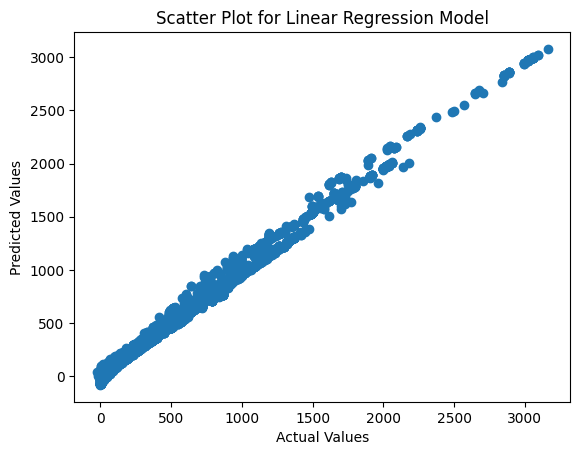

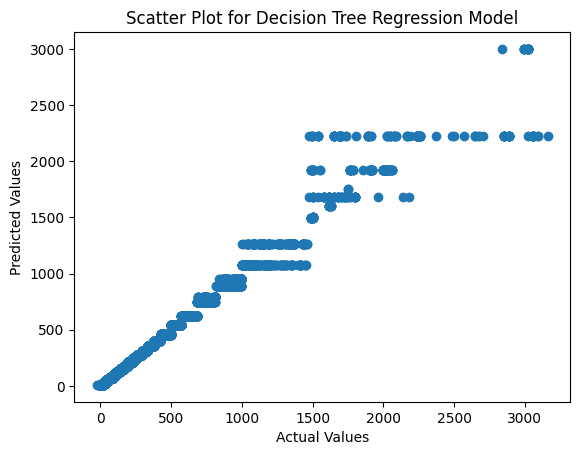

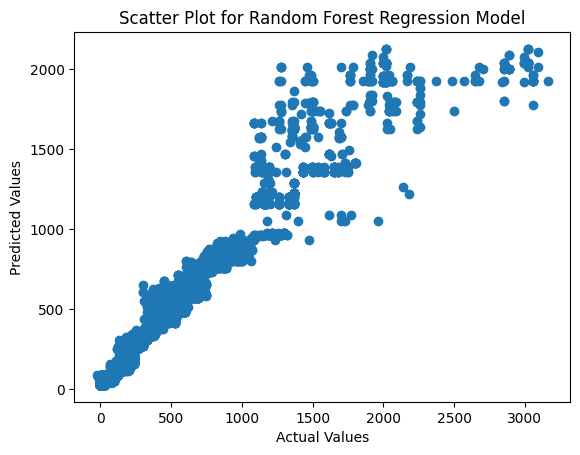

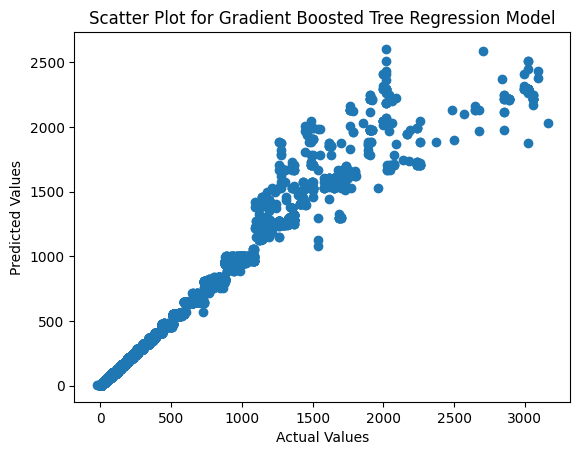

In [ ]:

# Scatter plots
actual_values = np.array(test_data.select("Profit").rdd.map(lambda row: row[0]).collect())

def plot_scatter(predictions, model_name):
    predicted_values = np.array(predictions.select("prediction").rdd.map(lambda row: row[0]).collect())
    plt.scatter(actual_values, predicted_values)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Scatter Plot for {model_name} Model")
    plt.show()

plot_scatter(linear_predictions, "Linear Regression")
plot_scatter(dt_predictions, "Decision Tree Regression")
plot_scatter(rf_predictions, "Random Forest Regression")
plot_scatter(gbt_predictions, "Gradient Boosted Tree Regression")


<b> Comparison table

In [ ]:
import pandas as pd

metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosted Tree Regression'],
    'MSE': [linear_mse, dt_mse, rf_mse, gbt_mse],
    'RMSE': [linear_rmse, dt_rmse, rf_rmse, gbt_rmse],
    'MAE': [linear_mae, dt_mae, rf_mae, gbt_mae]
}

# Create the pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
metrics_df


,Model,MSE,RMSE,MAE
0,Linear Regression,599.183526,24.478226,15.818181
1,Decision Tree Regression,2116.086100,46.000936,14.916604
2,Random Forest Regression,6078.529125,77.964922,36.480607
3,Gradient Boosted Tree Regression,2781.232639,52.737393,15.188562


Observations:

- The Decision Tree Regression model has the lowest MSE, indicating that it has the best performance in terms of predicting profit values with the smallest mean squared error.
- The Decision Tree Regression model also has the lowest RMSE, which further confirms its accuracy in predicting profit values with minimal root mean squared error.
- The Random Forest Regression model has the highest MSE and RMSE, suggesting that it may not perform as well as the other models in predicting profit values.
- The Linear Regression and Gradient Boosted Tree Regression models have similar MSE and RMSE values, with the Gradient Boosted Tree Regression model having slightly better performance in terms of these metrics.
- The MAE values are relatively close for all models, but the Decision Tree Regression model still stands out with the lowest MAE, indicating better performance in terms of mean absolute error.


Considering all the metrics, the Decision Tree Regression model seems to be the best performer among the four models for predicting profit values. However, it's essential to consider other factors like interpretability, model complexity, and business requirements when choosing the best model for deployment.






####<b>5.2. Tuning the best model

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor


train_data, test_data = preprocessed_data.randomSplit([0.8, 0.2], seed=42)
# Create the Decision Tree model
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Profit')

# Create the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [20, 30, 40]) \
    .build()

# Create the evaluator
evaluator = RegressionEvaluator(labelCol='Profit')

# Create the TrainValidationSplit
tvs = TrainValidationSplit(estimator=dt,
                           estimatorParamMaps=paramGrid,
                           evaluator=evaluator,
                           trainRatio=0.8)

# Fit the model to the data
tvs_model = tvs.fit(train_data)

# Get the best model from the tuning process
best_model = tvs_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(test_data)

# Calculate the evaluation metrics for the best model
tuned_mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
tuned_rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
tuned_mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})

# Print the evaluation metrics
print("Tuned Decision Tree Model Evaluation Metrics:")
print("MSE:", tuned_mse)
print("RMSE:", tuned_rmse)
print("MAE:", tuned_mae)


Tuned Decision Tree Model Evaluation Metrics:
MSE: 337.5257045662716
RMSE: 18.371872647236362
MAE: 4.490814244561249


It is observed that tuning has really helped and the MSE, RMSE and MAE error values are further reduced after tuning the model.

###<b>6. Ethical Principles

When utilizing machine learning models, such as the one for predicting bike sales, it is essential to adhere to ethical and moral principles to ensure responsible and fair use of the technology. Firstly, transparency and accountability must be upheld throughout the model's development and deployment. It is crucial to clearly communicate to stakeholders, including users and decision-makers, the purpose and limitations of the model, and to take responsibility for the outcomes it produces.

Respect for privacy and data protection is paramount. Ensuring that the data used for training and evaluation is obtained lawfully, with informed consent from individuals, and is safeguarded against unauthorized access is crucial. Anonymizing and aggregating data whenever possible to protect individuals' identities and prevent any potential discriminatory impact is also vital.

Additionally, the predictive model should be designed and validated without perpetuating biases or discrimination. Fairness and equity must be taken into account, and the model should not result in unfair advantages or disadvantages to certain individuals or groups. Rigorous testing and auditing of the model for potential biases should be performed, and steps should be taken to address and rectify any identified biases.

Interpretability is another critical aspect, especially when the model's predictions influence significant decisions. Ensuring that the model's decisions can be understood and explained in a human-readable manner is essential for building trust with users and stakeholders.

Lastly, continuous monitoring and evaluation of the model's performance, impact, and potential consequences are necessary. Regularly reassessing the model's fairness, accuracy, and ethical implications helps in addressing emerging issues and making necessary improvements.

By adhering to these ethical and moral principles, the use of machine learning in predicting bike sales can contribute positively to society, empower decision-makers, and provide valuable insights while respecting individual rights, fairness, and social responsibility.